# Cluster similar Houses
# 1.Data cleaning & getting rid of irrelevant information before clustering



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/house_rental_data.txt")
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.head()

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [ ]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [ ]:
#df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [ ]:
len(df["Sqft"].unique())

288

In [ ]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [ ]:
df.drop_duplicates()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
639,2846.400,5,12,4,2,2,138888
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000


In [ ]:
df["Floor"].unique()

array([ 2,  5, 11, 10,  4,  9,  6,  3, 19,  7, 21,  8,  1, 12, 13, 18, 14,
       16, 15, 22, 17])

In [ ]:
df["TotalFloor"].unique()

array([ 7, 14, 12,  5, 11, 19, 13,  9, 21, 15, 24,  4,  6, 25,  3, 10,  8,
       17, 20, 16, 18, 38, 27, 26,  1])

# 2.Finding the optimal value of k
# 3.Storing cluster to which the house belongs along with the data

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


In [ ]:
X = df
y = df["Sqft"]

In [ ]:
le = LabelEncoder()
X["Sqft"] = le.fit_transform(X["Sqft"])
le = LabelEncoder()
X["Price"] = le.fit_transform(X["Price"])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,91,2,7,2,2,2,91
1,219,5,7,4,2,2,109
2,85,5,7,2,2,1,83
3,139,2,7,3,2,2,61
4,69,11,14,3,2,2,61


In [ ]:
#y = le.transform(y)
#y

In [ ]:
col = X.columns
col

MultiIndex([(       'Sqft',),
            (      'Floor',),
            ( 'TotalFloor',),
            (    'Bedroom',),
            ('Living.Room',),
            (   'Bathroom',),
            (      'Price',)],
           )

In [ ]:
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns = [col])
X.head()

NameError: ignored

In [ ]:
Kmeans = KMeans(n_clusters = 3)
Kmeans.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=3)

In [ ]:
Kmeans.cluster_centers_

array([[0.14720318, 0.23169483, 0.24149956, 0.12903226, 0.34946237,
        0.21827957, 0.26428976],
       [0.75940687, 0.30506632, 0.33901024, 0.43150685, 0.50342466,
        0.46392694, 0.75883201],
       [0.44940476, 0.17420635, 0.21936937, 0.32916667, 0.48854167,
        0.38083333, 0.44580592]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

<function matplotlib.pyplot.show>

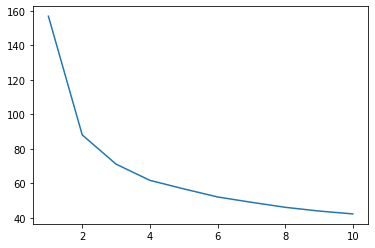

In [ ]:
cs=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = "k-means++" , max_iter = 300)
  kmeans.fit(X)
  cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.show

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
labels  = kmeans.labels_
correct_lable = sum (y==labels)
print(correct_lable , y.size)
print("Accuracy",correct_lable/float(y.size))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


0 645
Accuracy 0.0


In [ ]:
kmeans.labels_

array([0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0,
       1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0,
       1, 2, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1,
       1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 2, 1,
       0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 0,
       1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0,
       1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1,

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels  = kmeans.labels_
correct_lable = sum (y==labels)
print("out of ", y.size,"the labelled samples are " ,correct_lable)
print("Accuracy",correct_lable/float(y.size))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


out of  645 the labelled samples are  0
Accuracy 0.0
